In [1]:
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Read and understand the data

In [3]:
# Set path and directory

In [4]:
path='C:/AIML/Projects/'
suffix='.txt'
file='Qualitative_Bankruptcy.data'
os.chdir(path)

In [5]:
df=pd.read_csv(path+file+suffix) # read data

In [6]:
df.head() # check for data load

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [7]:
df.shape  # check shape

(249, 7)

In [8]:
df.columns # check columns names

Index(['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2', 'NB'], dtype='object')

In [9]:
df.dtypes # check data types

P      object
P.1    object
A      object
A.1    object
A.2    object
P.2    object
NB     object
dtype: object

In [10]:
df.isnull().any() # check for null values

P      False
P.1    False
A      False
A.1    False
A.2    False
P.2    False
NB     False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null object
P.1    249 non-null object
A      249 non-null object
A.1    249 non-null object
A.2    249 non-null object
P.2    249 non-null object
NB     249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [12]:
for i in df.columns :
    print('%s : '%(i),df[i].unique())

P :  ['N' 'A' 'P']
P.1 :  ['N' 'A' 'P']
A :  ['A' 'P' 'N']
A.1 :  ['A' 'P' 'N']
A.2 :  ['A' 'P' 'N']
P.2 :  ['N' 'A' 'P']
NB :  ['NB' 'B']


# Summary of overview
* There are 249 records and 7 features (6 are independent and 1 is dependent)
* There are no missing values
* Independent variables are categorical in nature with order (based on the information provided)
* Dependent variable is a binary categorical variable.
* we shall Encode/assign numeric values to the categorical columns to facilitate further analysis and model building 

# 2) Encode independent features

In [13]:
df_enc=df.copy() # make a copy of data frame

In [14]:
df_enc.replace(to_replace=['N', 'A', 'P','NB','B'],value=[0,1,2,0,1],inplace=True) # replace command for assignment

In [15]:
df_enc.head() # check data for reassignment

,P,P.1,A,A.1,A.2,P.2,NB
0,0,0,1,1,1,0,0
1,1,1,1,1,1,1,0
2,2,2,2,2,2,2,0
3,0,0,2,2,2,0,0
4,1,1,2,2,2,1,0


In [16]:
df_enc.info() # check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null int64
P.1    249 non-null int64
A      249 non-null int64
A.1    249 non-null int64
A.2    249 non-null int64
P.2    249 non-null int64
NB     249 non-null int64
dtypes: int64(7)
memory usage: 13.7 KB


# EDA -Target

In [17]:
df_enc.groupby('NB').NB.count() # Check distrubtion ofTarget variable

NB
0    142
1    107
Name: NB, dtype: int64

([<matplotlib.axis.XTick at 0x1ad87902630>,
 <a list of 2 Text xticklabel objects>)

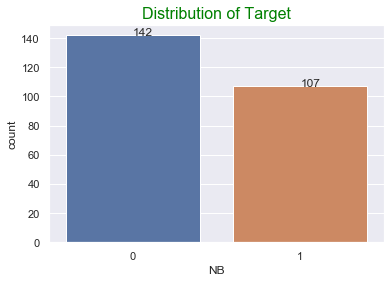

In [18]:
sns.set()
barplot=sns.countplot(df_enc.NB)
for bar in barplot.patches :
    yval= bar.get_height()
    barplot.annotate('%0.0f'%(yval),(bar.get_x()+bar.get_width()/2,yval))

plt.title('Distribution of Target',fontsize=16,color='green')
plt.xticks([0,1])



* Dependent varaible is distribution in the 57:43 ratio\
* Both categories are almost equally distributed and should help to build a model which predict both categories equally well

# EDA - Independent variables

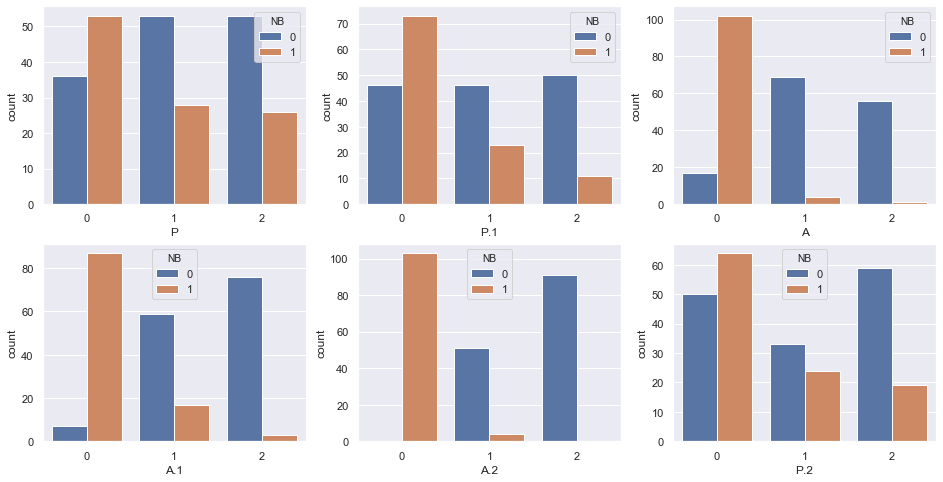

<Figure size 432x288 with 0 Axes>

In [19]:
col_num=df_enc.columns[~df_enc.columns.isin(['NB'])]
col_num
# box plot for outlier detection
sns.set()
k=0
row=2
col=3
fig,ax=plt.subplots(nrows=row,ncols=col,figsize=(16,8))
plt.figure(constrained_layout=True)
for i in np.arange(row) : 
    for j in np.arange(col):
        sns.countplot(x=df_enc[col_num[k]],ax=ax[i,j],data=df_enc,hue='NB')
        if k==5 :
            break
        else :
            k=k+1


* Bankcurpty positive cases reduces with increase in dependent variable ratings (0-2) (expected as 2 is most positive rating)
* A,A.1,A.2 is a stornger differentiator for bancrputcy identification as compared to P,P.1,P.2
* Negative rating (0) for A,A.1,A.2 have the maximum influence  on backruptcy positive identificaton(1)
* Based on above inference it is possible to generate new features as change in rating significantly influences bankcurtpcy  identification success ratio.

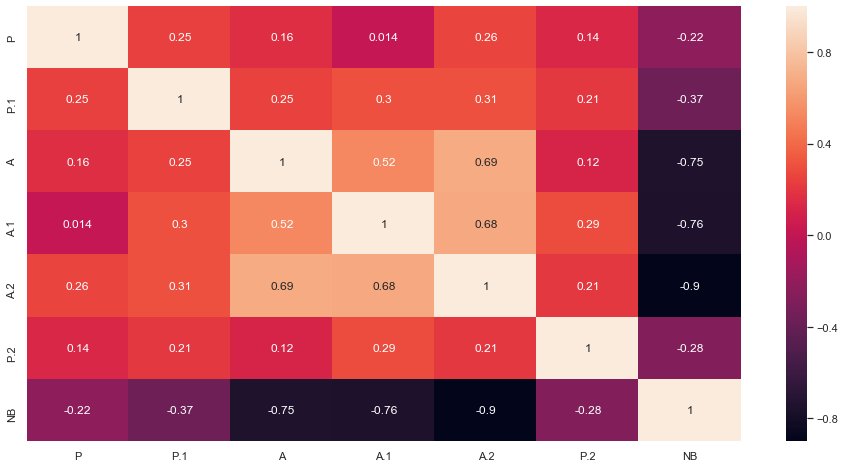

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(df_enc.corr(),annot=True)

* independent variables are not strongly intercorelated.
* Independent variable A,A1,A2 are strongly and negatively corelated to Target (similar observation made from count plots)

In [21]:
#sns.pairplot(df_enc,hue='NB')

# 3) Seperate Target from independent variables

In [22]:
X=df_enc.drop('NB',axis=1) # seperate X
y=df_enc['NB'] # seperate y

In [23]:
X.head() # check for seperation

,P,P.1,A,A.1,A.2,P.2
0,0,0,1,1,1,0
1,1,1,1,1,1,1
2,2,2,2,2,2,2
3,0,0,2,2,2,0
4,1,1,2,2,2,1


In [24]:
y.head() # check for seperation

0    0
1    0
2    0
3    0
4    0
Name: NB, dtype: int64

# 4) Split train and test split

In [25]:
from sklearn.model_selection import train_test_split # import library and applicable class

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0) # split in 80:20 ratio

# 5) Apply PCA

In [27]:
from sklearn.decomposition import PCA  # import library and applicable class

In [28]:
pca=PCA() # initialize PCA

In [29]:
pca.fit(X_train) # fit PCA on Train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# 6) Elbow plot to identify the contribution of components to vairance explained

In [30]:
pca.explained_variance_ # variance explained

array([1.8601488 , 0.72919445, 0.66238509, 0.48285971, 0.28202423,
       0.18297149])

In [31]:
pca.explained_variance_.sum() #Total variance explained

4.199583777473224

In [32]:
(pca.explained_variance_/pca.explained_variance_.sum()*100) # PCA expained in percentage

array([44.29364677, 17.36349331, 15.77263675, 11.49779921,  6.71552816,
        4.35689579])

In [33]:
var_cum=np.zeros(X_train.columns.size) # array to hold cumulaite variance

In [34]:
var_cum=np.zeros(X_train.columns.size)
for i,v in enumerate(pca.explained_variance_/pca.explained_variance_.sum()*100):
    if i==0:
        var_cum[i]=v
    else:
        var_cum[i]=v+var_cum[i-1]
       


In [35]:
var_cum # check the cumulative array 

array([ 44.29364677,  61.65714008,  77.42977683,  88.92757605,
        95.64310421, 100.        ])

Text(0.5, 1.0, 'Elbow plot for Variance explained')

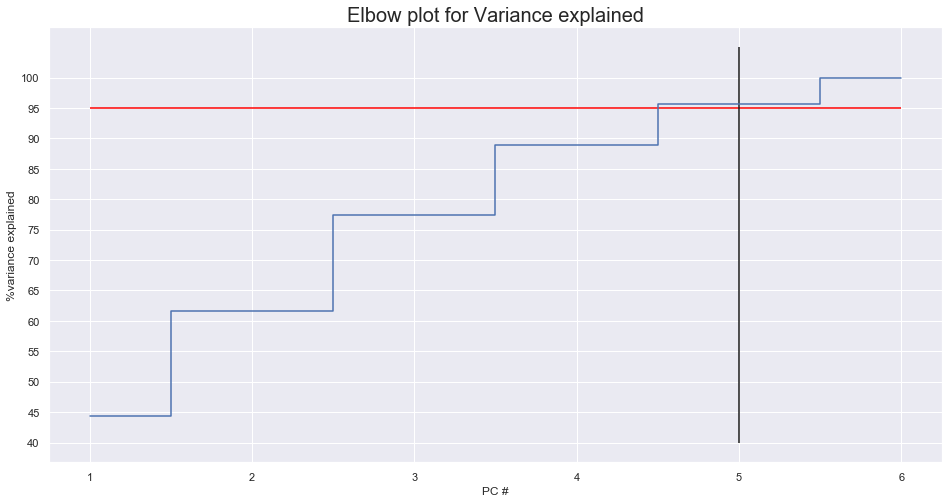

In [36]:
sns.set()
plt.figure(figsize=(16,8))
plt.step(x=np.arange(1,var_cum.size+1),y=var_cum, where= 'mid')
plt.yticks(np.arange(40,105,5))
plt.hlines(95,xmin=1,xmax=6,colors='red')
plt.vlines(5,ymin=40,ymax=105)
plt.xlabel('PC #')
plt.ylabel('%variance explained')
plt.title('Elbow plot for Variance explained',fontsize=20)

* Frist 5 components explained the 95% of the variance

# 7) Transform the data Using PCA using optimum number of components

In [37]:
pca=PCA(n_components=5) # reinitialize PCA with 5 components

In [38]:
X_tf_train=pca.fit_transform(X_train) # fit and trasnforom PCA on train set

In [39]:
X_tf_train[0:5]

array([[-0.47998121,  1.34396665,  0.14883346, -0.16313602, -0.13238639],
       [ 1.37998575,  0.37480794, -0.13128393, -0.0142739 ,  0.54728875],
       [-1.14396667, -0.67566657, -1.56010706,  0.33796324, -0.61669521],
       [ 0.09632768,  1.54851131,  0.31225982, -0.34573687, -0.05571621],
       [ 1.81744472, -0.88487662,  0.09775368, -0.84396665, -0.66363652]])

In [40]:
X_train_5D=pd.DataFrame(X_tf_train,columns=['pc1','pc2','pc3','pc4','pc5']) # data frame with trasnformed features

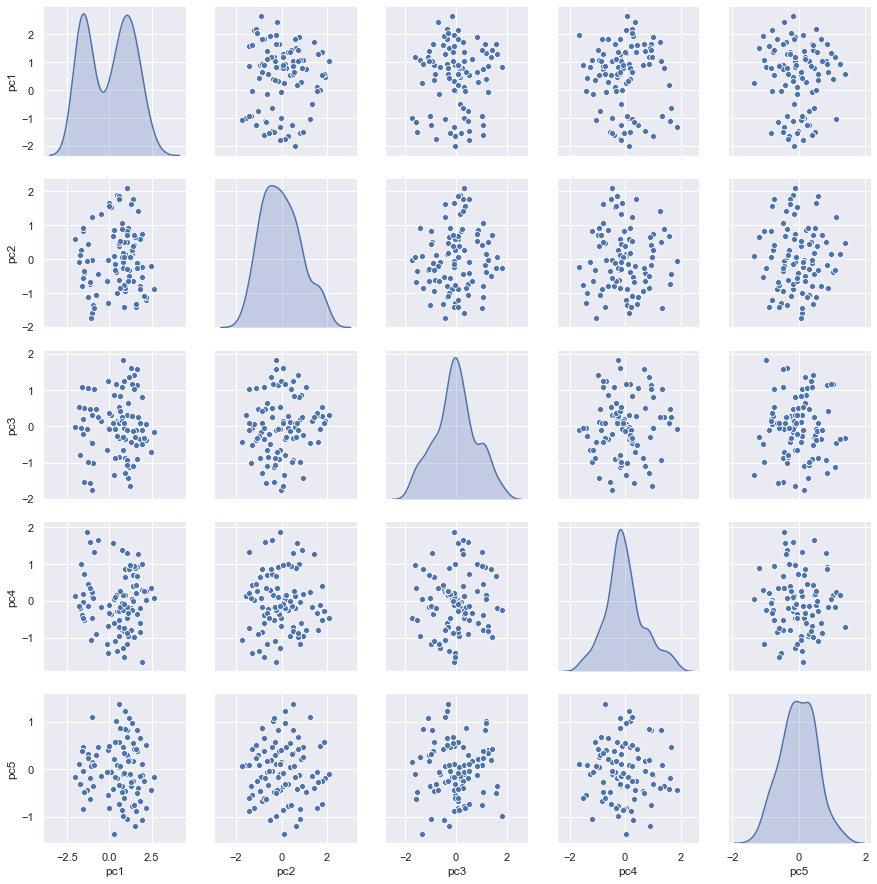

In [41]:
sns.pairplot(X_train_5D,diag_kind='kde')

* Based on the pair plot it can be infered that there can be 2-3 clusters

Text(0.5, 1, 'Corelation plot ')

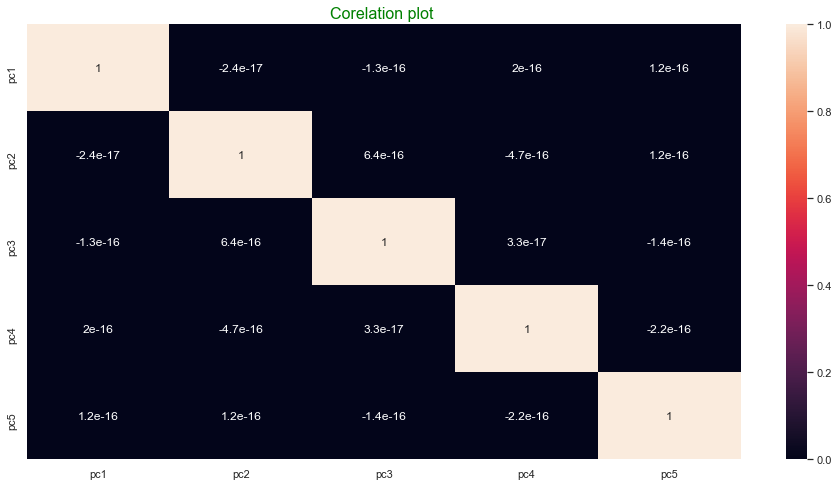

In [42]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train_5D.corr(),annot=True)
plt.title('Corelation plot ',fontsize=16,color='green')

* no corelation between transformed dependent variable after pc as expected

# 8&9) Apply K means clustering,select optimal number of cluster and form cluster 

In [43]:
from sklearn.cluster import KMeans # import relevant libraries

In [44]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
labels=[]
centroids=[]
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_train_5D)
  labels.append(clusters.labels_)                    # capture the cluster lables
  centroids.append(clusters.cluster_centers_)        # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:5]

,num_clusters,cluster_errors
0,1,795.289233
1,2,480.584919
2,3,395.059899
3,4,343.682864
4,5,300.817197


Text(0.5, 1.0, 'Elbow plot')

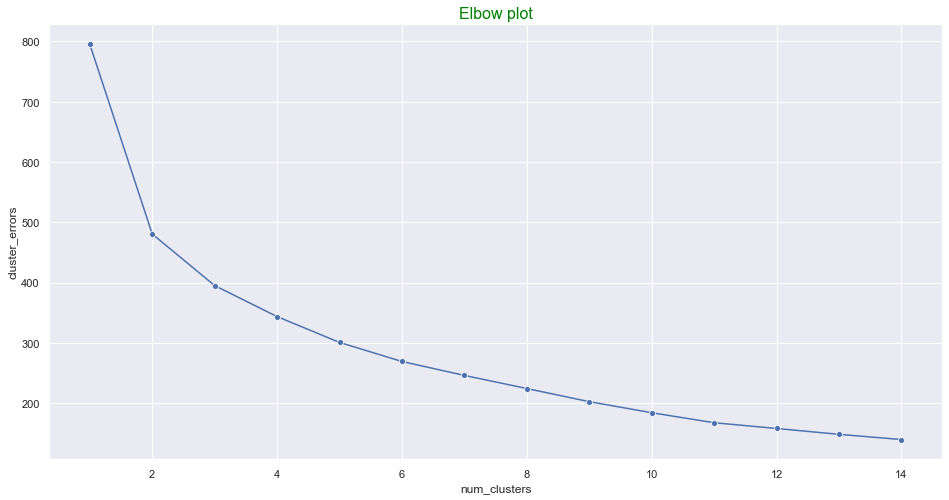

In [45]:
# plot inertias vs number of clusters
plt.figure(figsize=(16,8))
sns.lineplot(x='num_clusters',y='cluster_errors',data=clusters_df,marker='o')
plt.title('Elbow plot',fontsize=16,color='green')

* 2-3 cluster seams optimal, let us verify with other means based on silhouette score and agglomerative clustering

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3599253899221991


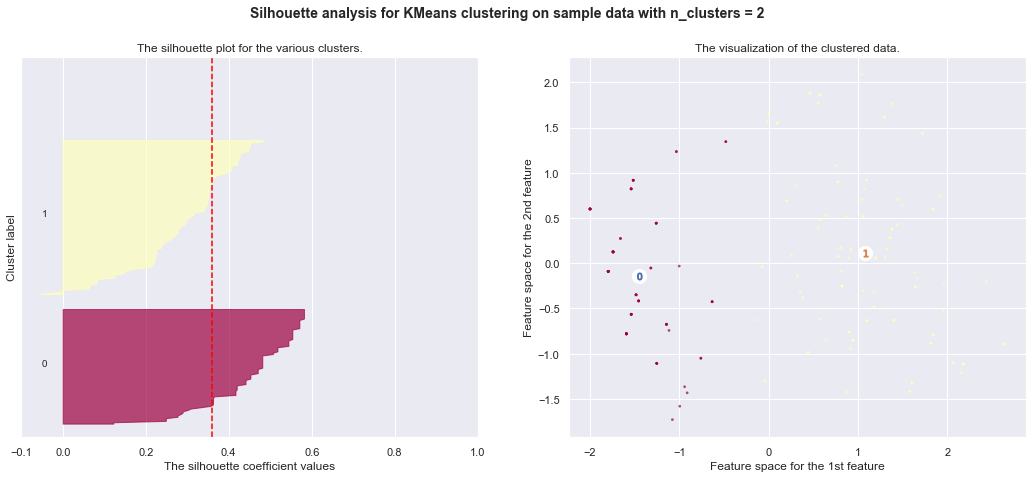

For n_clusters = 3 The average silhouette_score is : 0.31466835841263546


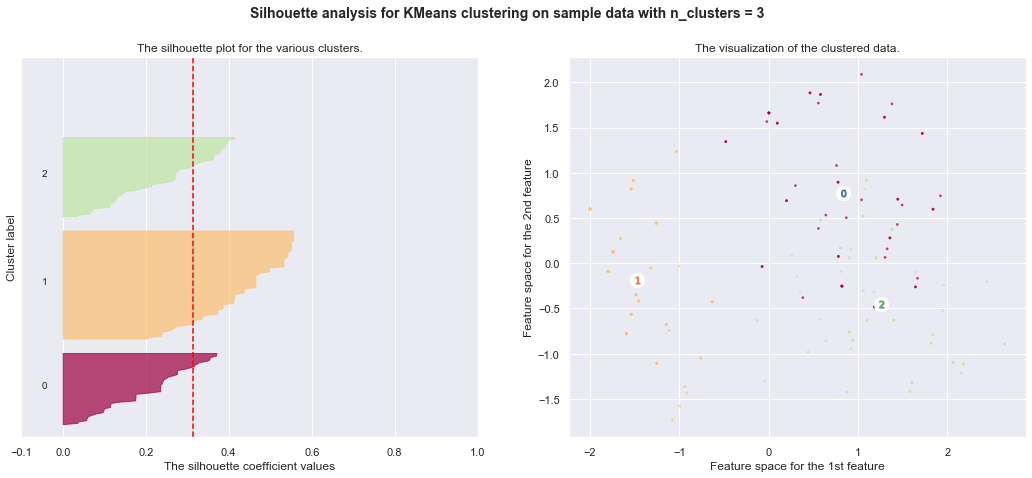

For n_clusters = 4 The average silhouette_score is : 0.26835085782356716


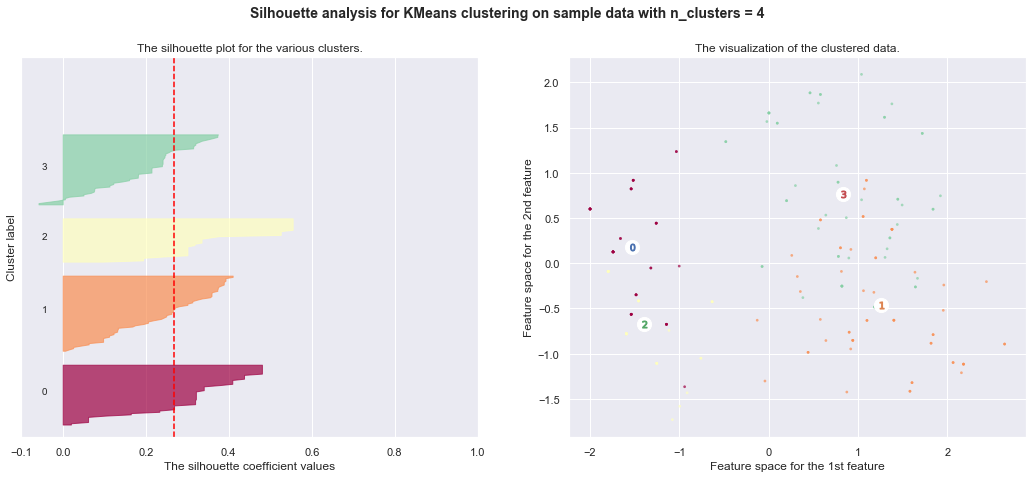

For n_clusters = 5 The average silhouette_score is : 0.2805235356106508


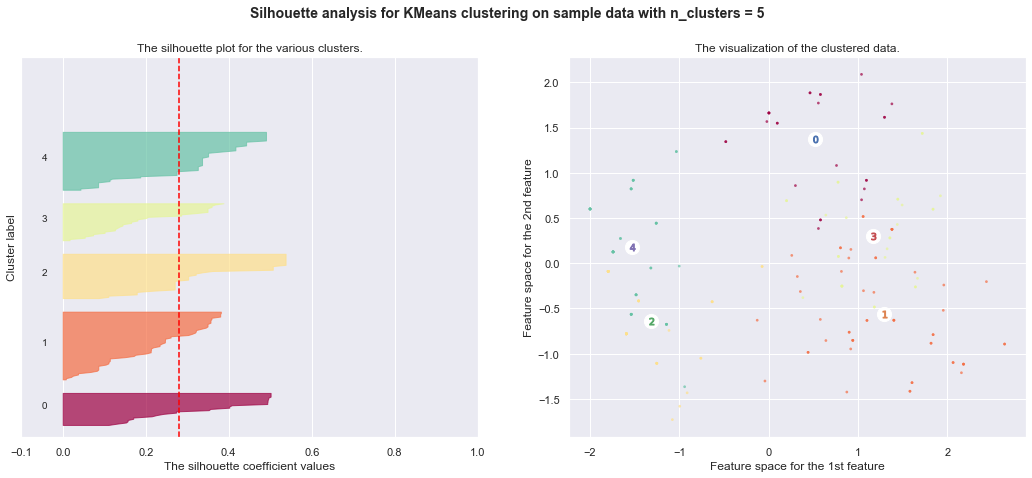

For n_clusters = 6 The average silhouette_score is : 0.2837619391126446


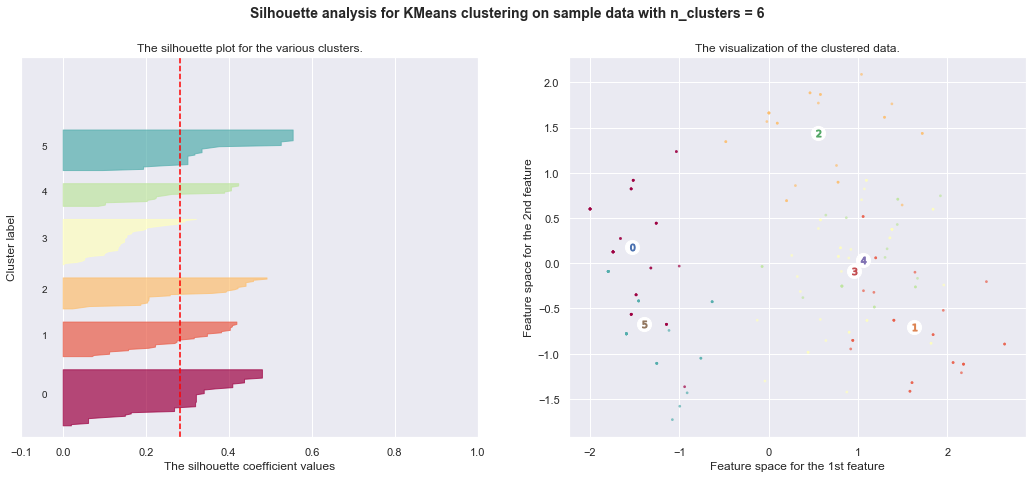

For n_clusters = 7 The average silhouette_score is : 0.28081301655077817


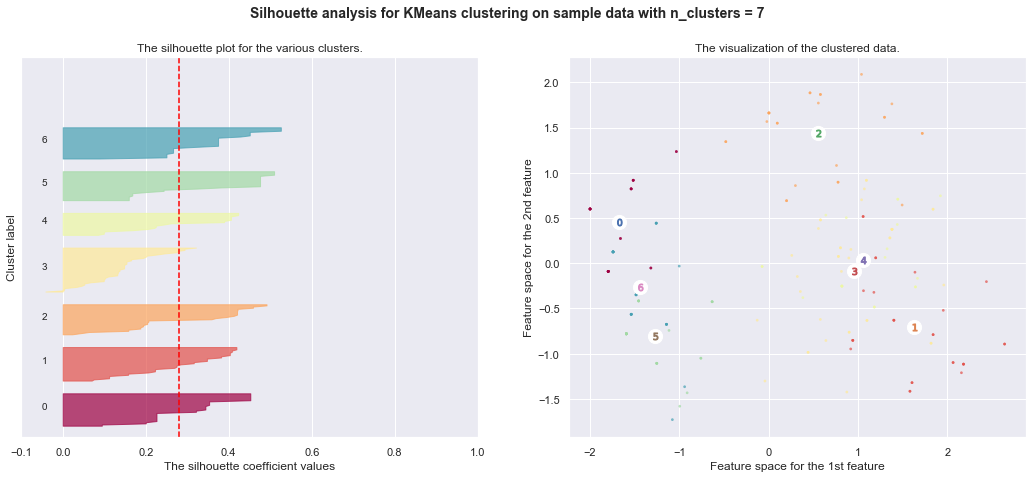

For n_clusters = 8 The average silhouette_score is : 0.306353259385022


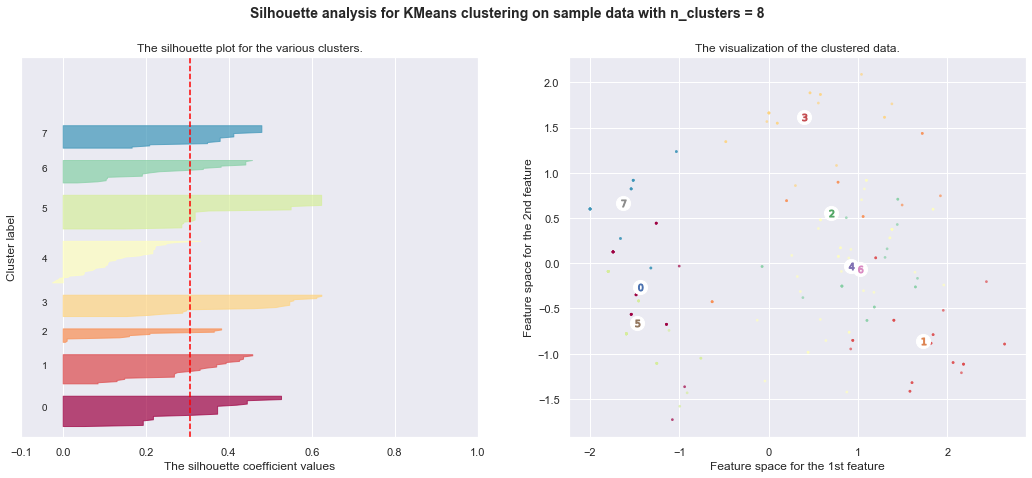

For n_clusters = 9 The average silhouette_score is : 0.31511957353117004


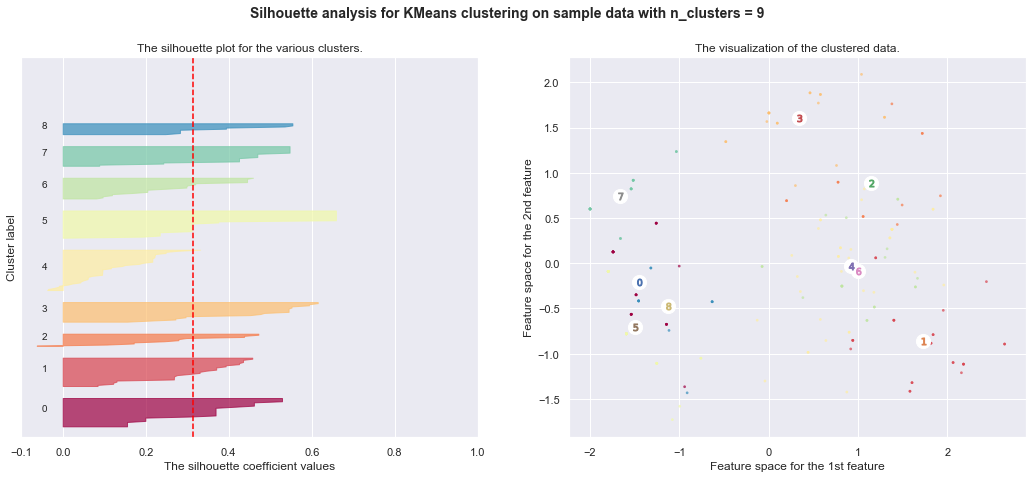

For n_clusters = 10 The average silhouette_score is : 0.322540564311513


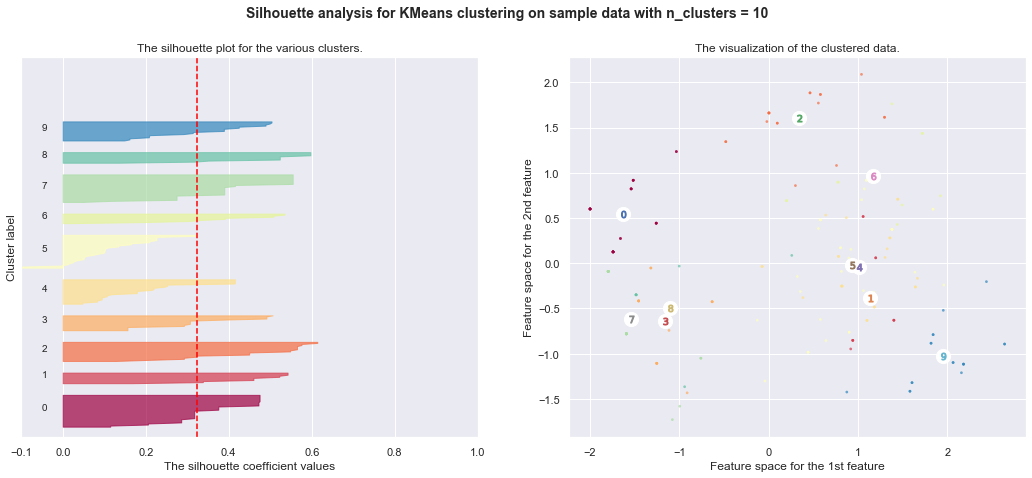

For n_clusters = 11 The average silhouette_score is : 0.33509352842778256


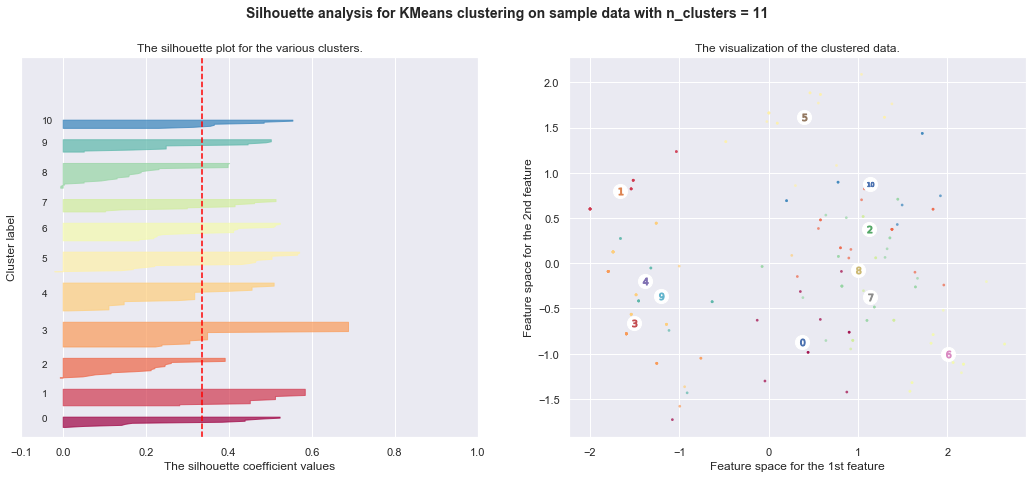

For n_clusters = 12 The average silhouette_score is : 0.34319018857664924


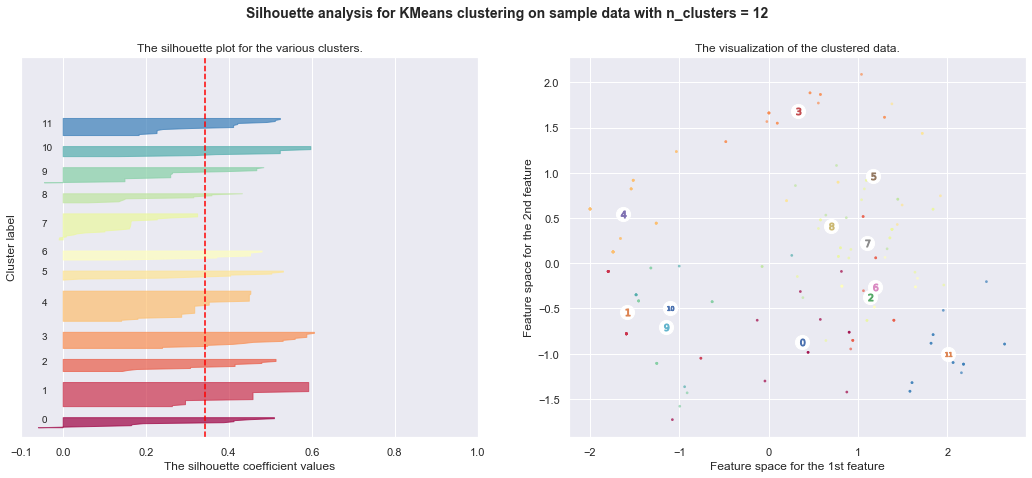

For n_clusters = 13 The average silhouette_score is : 0.3408785363687506


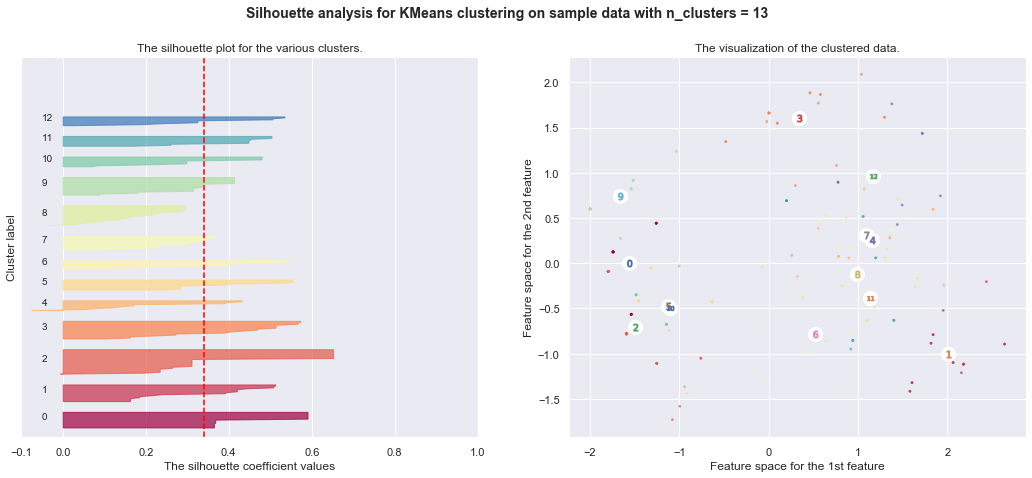

For n_clusters = 14 The average silhouette_score is : 0.35788929408992204


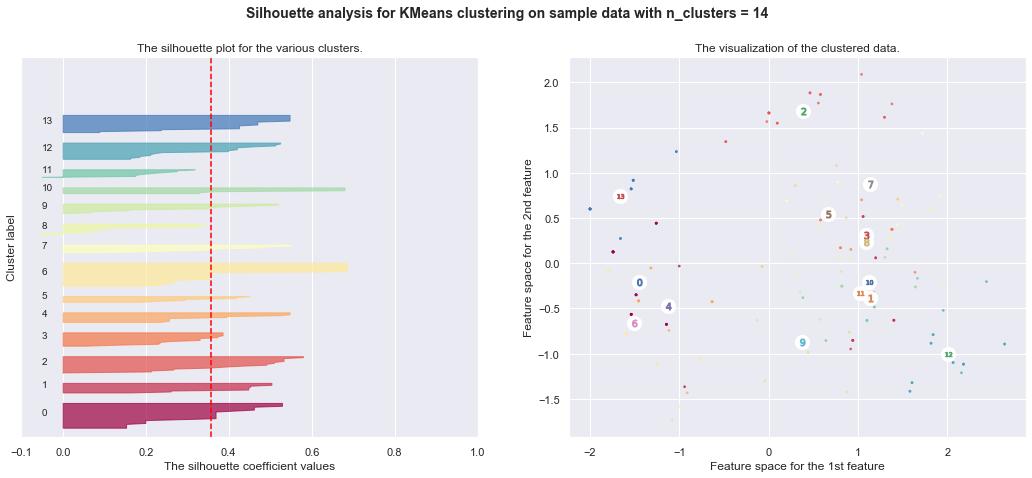

For n_clusters = 15 The average silhouette_score is : 0.35601715543430346


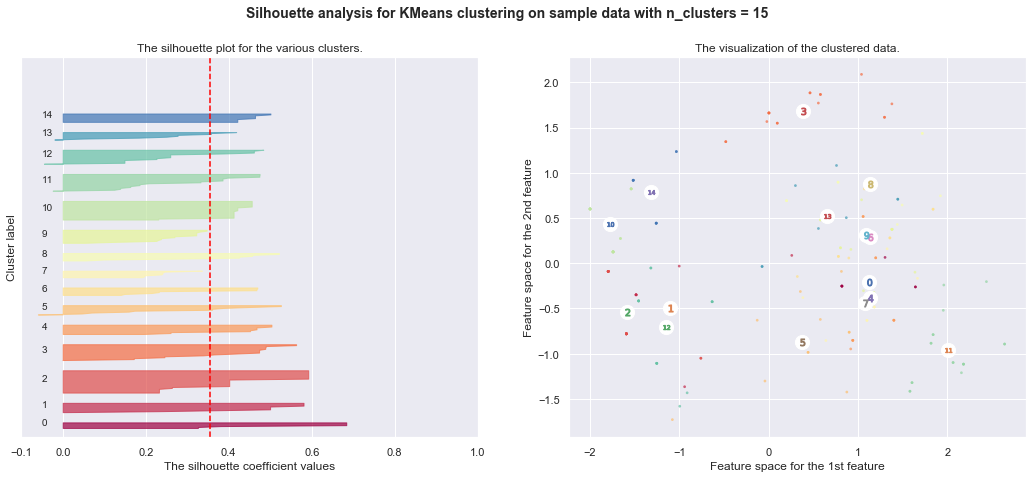

For n_clusters = 16 The average silhouette_score is : 0.35986427991139525


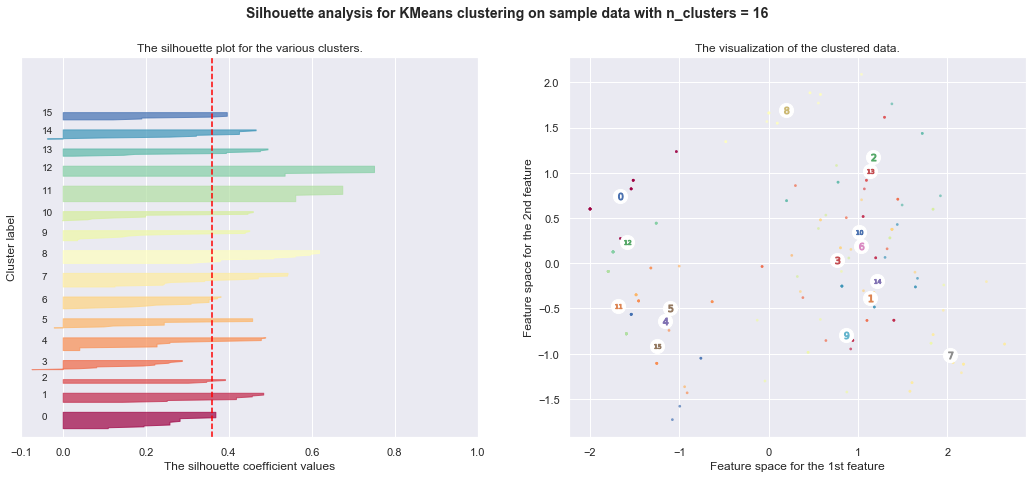

In [46]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_5D)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_5D, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_5D, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_5D['pc1'], X_train_5D['pc2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

* 2 clusters are the most ideal cluster based on the silhouette score

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
cl_ag=AgglomerativeClustering()

In [49]:
cl_ag.fit(X_train_5D)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

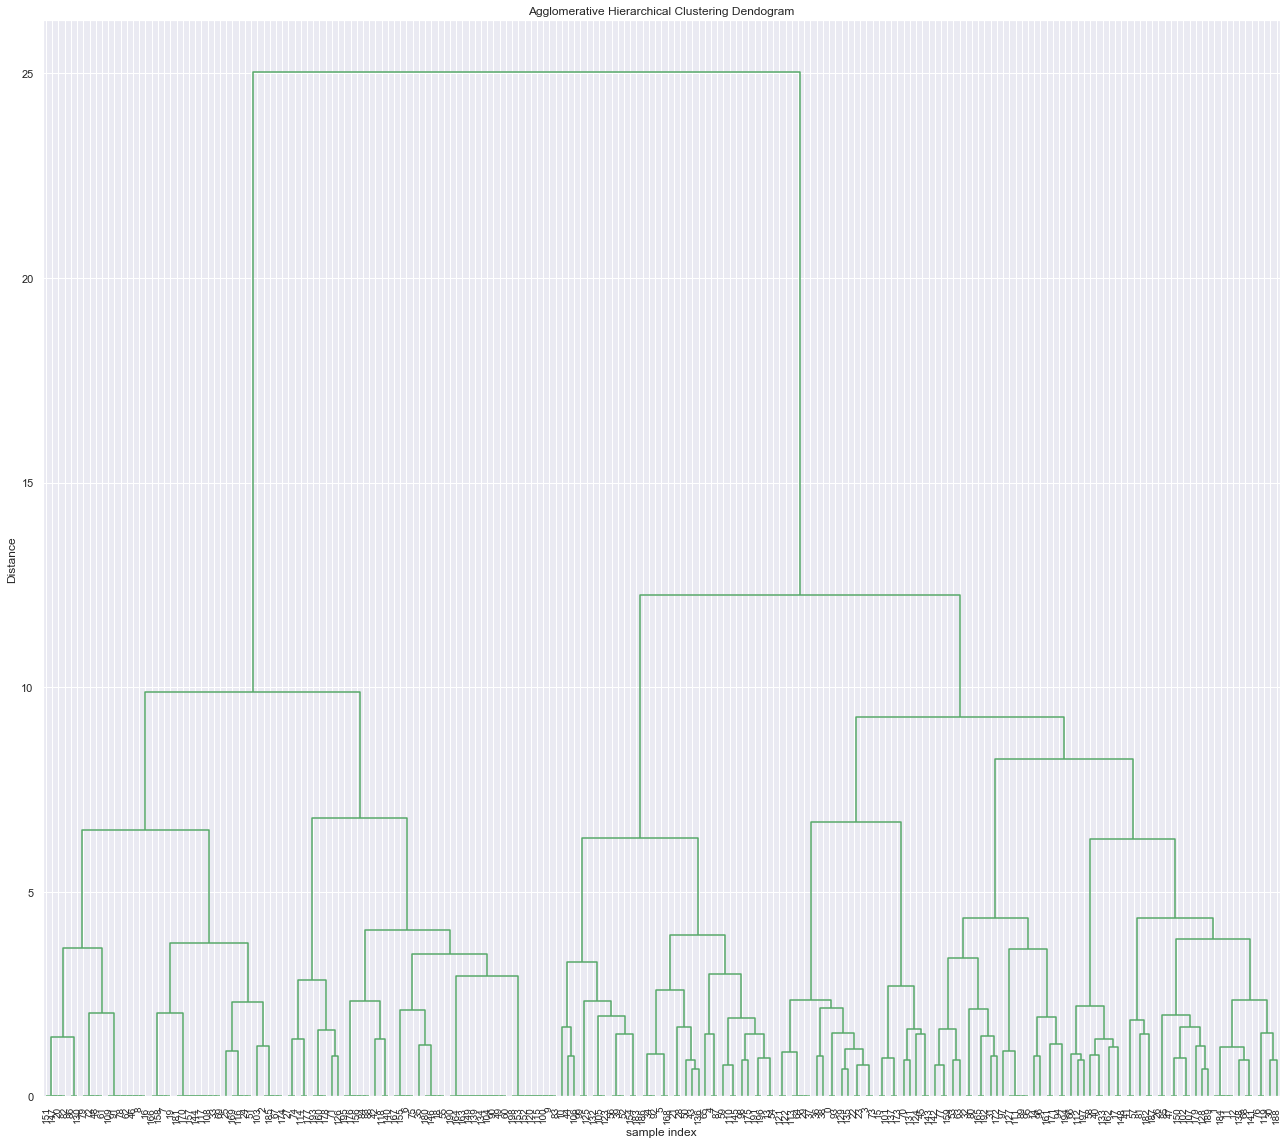

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_train_5D, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=80,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

* 2 clusters seems ideal

# Retrain the model with 2 cluster based on above analysis

In [51]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X_train_5D)
# Getting the cluster labels
labels = kmeans.predict(X_train_5D)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-1.44651761 -0.14458314 -0.03429107  0.08033141 -0.00533797]
 [ 1.07854383  0.10780322  0.0255679  -0.05989623  0.00398006]]


# 10) Creat a new colum with labels

In [52]:
X_train_5D['Labels']=labels # assign lables to column

In [53]:
X_train_5D.head() # check assignment

,pc1,pc2,pc3,pc4,pc5,Labels
0,-0.479981,1.343967,0.148833,-0.163136,-0.132386,0
1,1.379986,0.374808,-0.131284,-0.014274,0.547289,1
2,-1.143967,-0.675667,-1.560107,0.337963,-0.616695,0
3,0.096328,1.548511,0.312260,-0.345737,-0.055716,1
4,1.817445,-0.884877,0.097754,-0.843967,-0.663637,1


In [54]:
X_train_5D.Labels.unique() # check label values

array([0, 1], dtype=int64)

C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


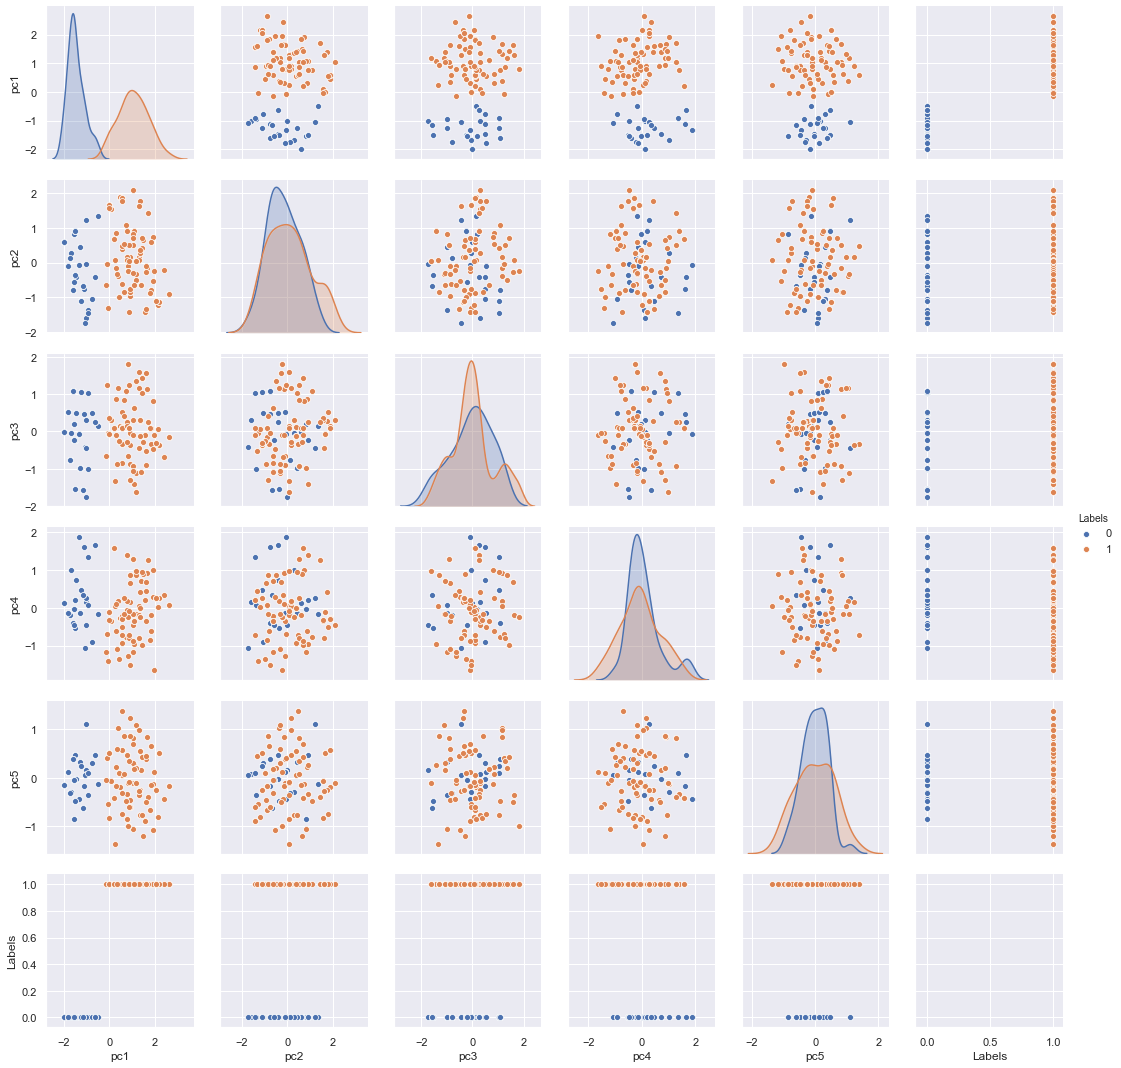

In [55]:
sns.pairplot(data=X_train_5D,diag_kind='kde',hue='Labels') # distribution of labels on different features

* Clear label differentiation seen on first components which explains max variance

#  11) Transform test set using PCA

In [56]:
X_tf_test=pca.transform(X_test) # transform test set
X_tf_test[0:5] # check for transformation

array([[-0.75896382, -1.05059727,  0.4945912 , -0.91085858,  0.30144611],
       [-1.45575409, -0.41679602,  0.50704517,  0.73576986, -0.02990211],
       [ 1.4012615 , -0.63060844, -1.07850142,  0.70472299,  0.16887793],
       [-1.00115381, -0.03197501, -1.74651488, -0.46981293,  0.16146183],
       [-0.63269869, -0.42580381,  0.26646696,  1.66350485,  0.46170152]])

In [57]:
X_test_5D=pd.DataFrame(X_tf_test,columns=['pc1','pc2','pc3','pc4','pc5']) # conver to dataframe with labels

In [58]:
X_test_5D.head() # check for assignment

,pc1,pc2,pc3,pc4,pc5
0,-0.758964,-1.050597,0.494591,-0.910859,0.301446
1,-1.455754,-0.416796,0.507045,0.735770,-0.029902
2,1.401262,-0.630608,-1.078501,0.704723,0.168878
3,-1.001154,-0.031975,-1.746515,-0.469813,0.161462
4,-0.632699,-0.425804,0.266467,1.663505,0.461702


# 12. Assign cluster labels to the test data and store it as a feature.

In [59]:
# predict the cluster labels for test set
labels = kmeans.predict(X_test_5D)

In [60]:
X_test_5D['Labels']=labels # assigns  labels to a column in data frame

In [61]:
X_test_5D.head() #check for assignment

,pc1,pc2,pc3,pc4,pc5,Labels
0,-0.758964,-1.050597,0.494591,-0.910859,0.301446,0
1,-1.455754,-0.416796,0.507045,0.735770,-0.029902,0
2,1.401262,-0.630608,-1.078501,0.704723,0.168878,1
3,-1.001154,-0.031975,-1.746515,-0.469813,0.161462,0
4,-0.632699,-0.425804,0.266467,1.663505,0.461702,0


In [62]:
X_test_5D.Labels.unique() #check for unique values

array([0, 1], dtype=int64)

C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gagan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


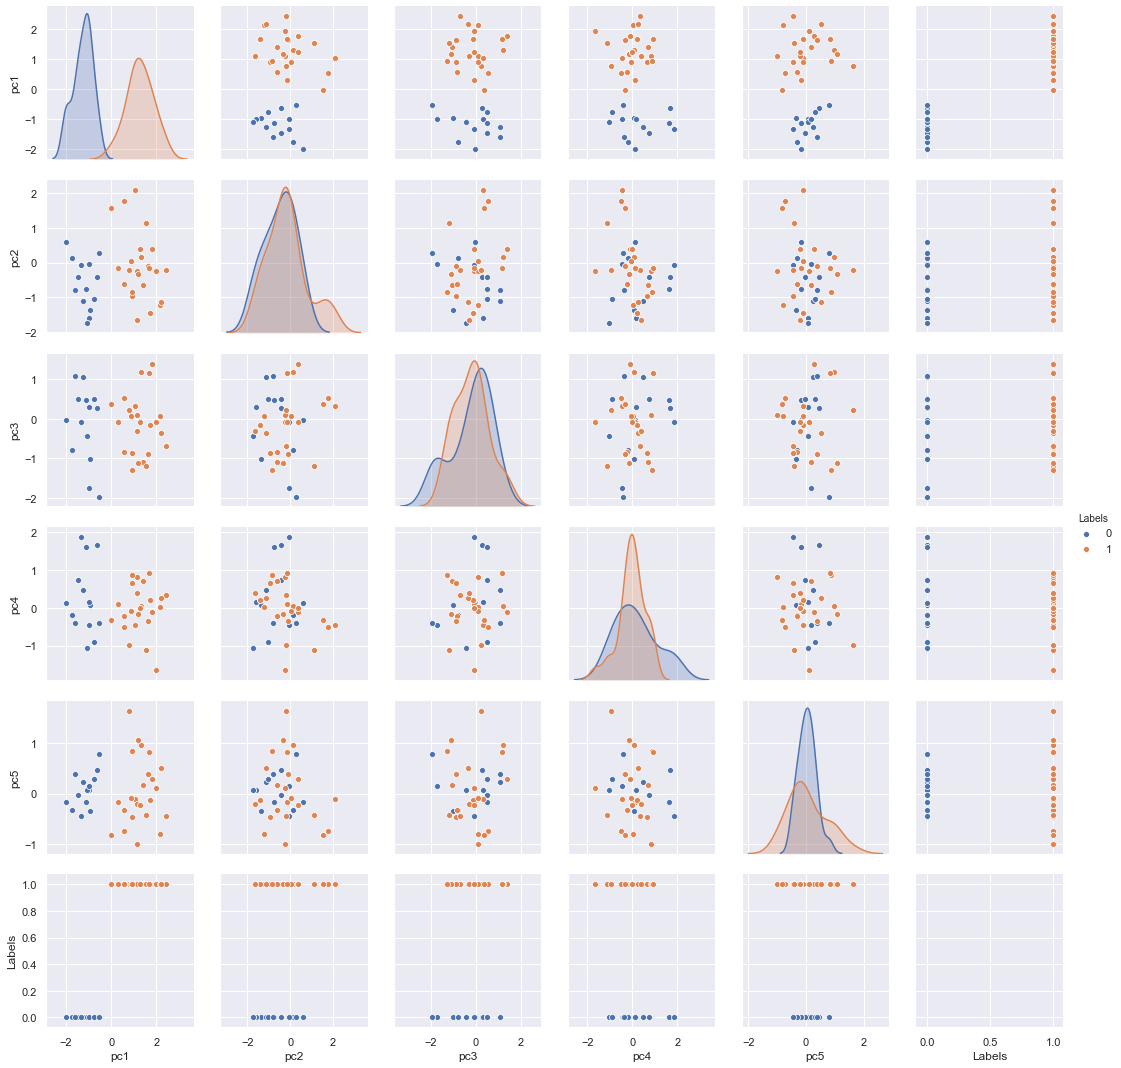

In [63]:
sns.pairplot(data=X_test_5D,diag_kind='kde',hue='Labels') # check distribution of test labels on feature space

# 13 Appy SVC model

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [65]:
scaler=MinMaxScaler()  #initialize scaler

In [66]:
X_train_scaled=scaler.fit_transform(X_train) # fit and transform train data using standard scaler

In [67]:
X_test_scaled=scaler.transform(X_test) # transform test data using standard scaler

In [68]:
svc=SVC() # initialize SV classifier

In [69]:
svc.fit(X_train_scaled,y_train) # fit the model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
y_test_predict=svc.predict(X_test_scaled) # predict test data

# 14 check accuracy and confusion matrix

In [71]:
print ('Train accuracy score :',accuracy_score(y_train,svc.predict(X_train_scaled))) # accuracy of train data

Train accuracy score : 1.0


Text(0.5, 1, 'Confusion matrix of Train data')

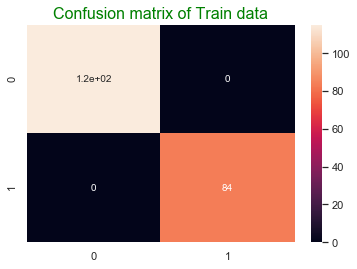

In [72]:
# np.set_printoptions(precision=2)
sns.heatmap(confusion_matrix(y_train,svc.predict(X_train_scaled)),annot=True)
plt.title('Confusion matrix of Train data',fontsize=16,color='green')

In [73]:
print ('Test accuracy score :',accuracy_score(y_test,y_test_predict))

Test accuracy score : 1.0


Text(0.5, 1, 'Confusion matrix of Test data')

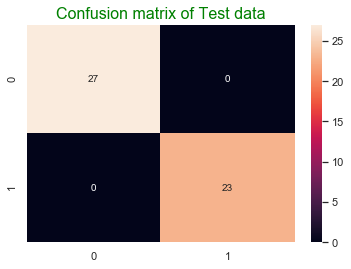

In [74]:

sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True)
plt.title('Confusion matrix of Test data',fontsize=16,color='green')

* Interestly, both SVC model classifies both train and test labelsm with 100% accuracy